In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# impoet data
df = pd.read_csv('Task6DiabetesDataset.csv')


In [3]:
#Checking columns names
print(df.columns.values)
print("Shape of Dataset is : ",df.shape)

['PatientID' 'age' 'sex' 'bmi' 'bp' 'glucose' 'insulin' 'hba1c'
 'diabetes_pedigree' 'target']
Shape of Dataset is :  (40, 10)


In [4]:
#Dropping Null Values
df.dropna(inplace=True)
print("Shape of Dataset is : ",df.shape)
df.isna().sum()

Shape of Dataset is :  (36, 10)


,0
PatientID,0
age,0
sex,0
bmi,0
bp,0
glucose,0
insulin,0
hba1c,0
diabetes_pedigree,0
target,0


In [5]:
#Printing info and description of dataset
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 39
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          36 non-null     int64  
 1   age                36 non-null     int64  
 2   sex                36 non-null     int64  
 3   bmi                36 non-null     float64
 4   bp                 36 non-null     float64
 5   glucose            36 non-null     float64
 6   insulin            36 non-null     int64  
 7   hba1c              36 non-null     float64
 8   diabetes_pedigree  36 non-null     float64
 9   target             36 non-null     int64  
dtypes: float64(5), int64(5)
memory usage: 3.1 KB


,PatientID,age,sex,bmi,bp,glucose,insulin,hba1c,diabetes_pedigree,target
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,20.750000,56.722222,0.583333,26.272222,88.222222,142.694444,97.888889,5.861111,0.511111,0.472222
std,12.192211,7.089675,0.500000,2.310796,6.668095,10.520237,7.535735,0.419713,0.190904,0.506309
min,1.000000,45.000000,0.000000,21.700000,73.000000,119.000000,83.000000,5.000000,0.200000,0.000000
25%,9.750000,51.750000,0.000000,24.675000,84.000000,135.000000,90.750000,5.500000,0.300000,0.000000
50%,20.500000,56.000000,1.000000,26.350000,88.500000,144.500000,98.500000,5.850000,0.500000,0.000000
75%,31.250000,62.000000,1.000000,27.850000,93.000000,150.000000,104.250000,6.200000,0.700000,1.000000
max,40.000000,70.000000,1.000000,30.200000,100.000000,160.000000,110.000000,6.500000,0.800000,1.000000


In [6]:
#Visualization
#Ques.1 How many persons have Diabetes and  how many do not have diabetes

df.target.value_counts()

,count
target,
0,19
1,17


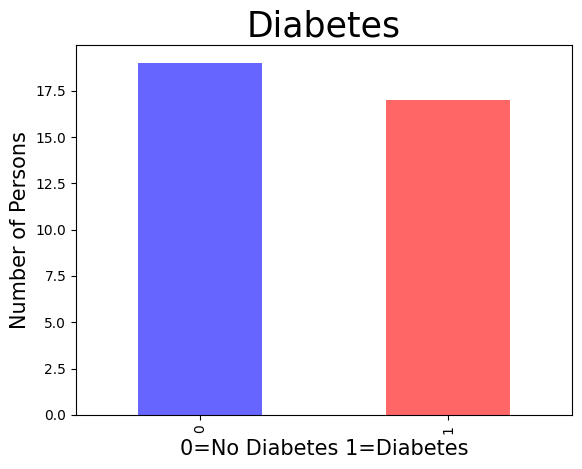

In [7]:
#plotting results using bar chart
df.target.value_counts().plot(kind='bar',color=['b','r'],alpha=0.6)
plt.title("Diabetes",fontsize=25)
plt.xlabel("0=No Diabetes 1=Diabetes",fontsize=15)
plt.ylabel("Number of Persons",fontsize=15)
plt.show()

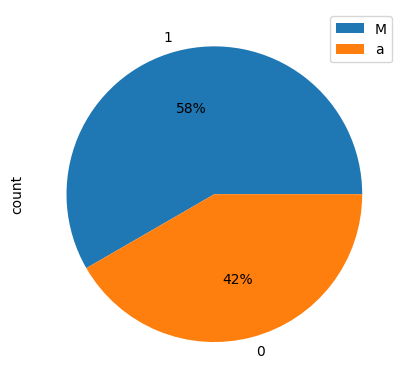

In [8]:
# Ques2.  How many male and female are in the dataset
df.sex.value_counts()
#Plotting results
df.sex.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.legend(['Female','Male'])
plt.legend("Male Female Ratio")
plt.show()

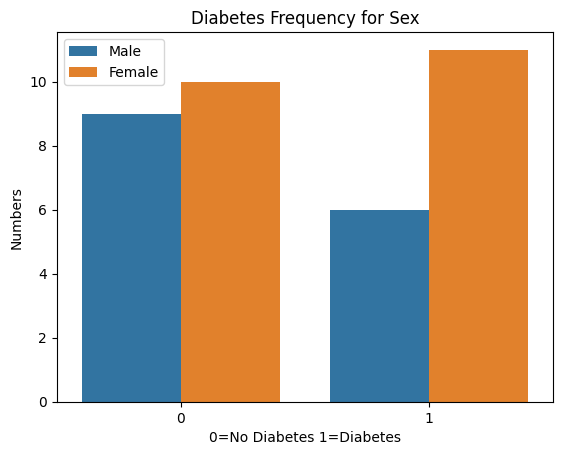

In [9]:
#Ques.3 Persons of which sex has the most Positive cases of Diabetes
pd.crosstab(df.target,df.sex)
sns.countplot(x='target',hue='sex',data=df)
plt.title("Diabetes Frequency for Sex")
plt.xlabel("0=No Diabetes 1=Diabetes")
plt.ylabel("Numbers")
plt.legend(["Male","Female"],loc=2)
plt.show()

In [10]:
#Ques 4.What BMI range has the highest number of positive cases of diabetes?

# Creating BMI ranges
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
df['bmi_range'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

In [11]:
# Crosstab to see the distribution
pd.crosstab(df['target'], df['bmi_range'])


bmi_range,Normal weight,Overweight,Obese
target,,,
0,11,8,0
1,0,15,2


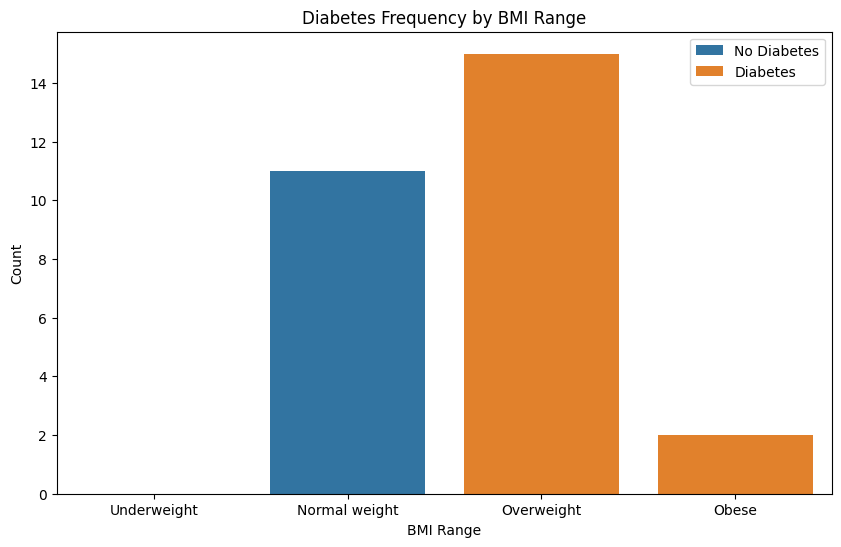

In [12]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.countplot(x='bmi_range', hue='target', data=df)
plt.title("Diabetes Frequency by BMI Range")
plt.xlabel("BMI Range")
plt.ylabel("Count")
plt.legend(["No Diabetes", "Diabetes"], loc='upper right')
plt.show()

In [13]:
#Ques.5 What blood pressure (bp) range has the highest number of positive cases of diabetes?

# Creating blood pressure (bp) ranges
bins = [0, 80, 120, 140, 200]
labels = ['Low', 'Normal', 'Pre-high', 'High']
df['bp_range'] = pd.cut(df['bp'], bins=bins, labels=labels, right=False)

In [14]:
# Crosstab to see the distribution
bp_distribution = pd.crosstab(df['target'], df['bp_range'])

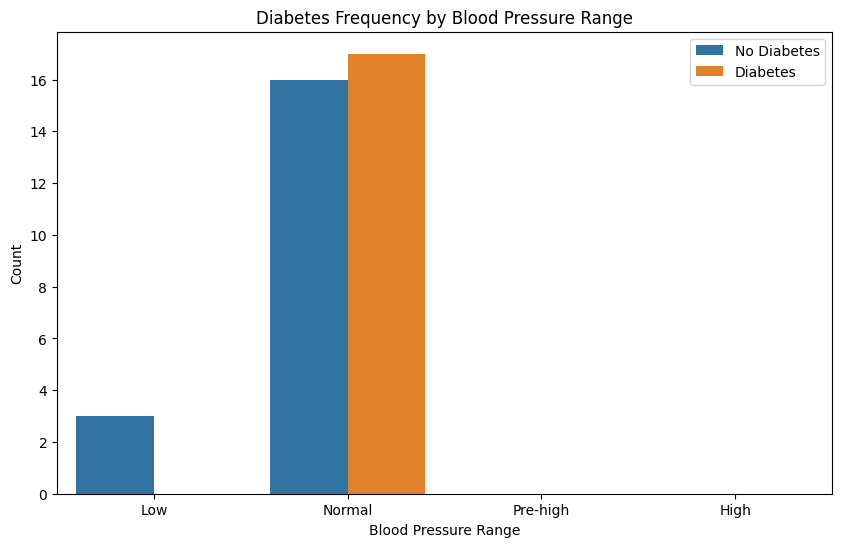

In [15]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.countplot(x='bp_range', hue='target', data=df)
plt.title("Diabetes Frequency by Blood Pressure Range")
plt.xlabel("Blood Pressure Range")
plt.ylabel("Count")
plt.legend(["No Diabetes", "Diabetes"], loc='upper right')
plt.show()